In [3]:
from ego_solver import EGO
import numpy as np
# from matplotlib import colors, ticker, cm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle
%matplotlib inline

E:\ProgramFiles_w\Engineering\Anaconda\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [4]:
file_address = 'solution_obj_name_branin_maxiter_100_repeat_30.pkl'
with open(file_address, 'r') as f:
    dat = pickle.load(f)

In [6]:
solution = np.array(dat['solution'])
solution.shape

(30L, 4L, 2L)

In [25]:
### DO NOT RUN UNLESS YOU HAVE A LONG TIME TO WAIT!
all_01_trials_branin = np.zeros((30,4,5))

num_ini_guess = 5
bounds = np.array([[-5, 10], [0, 15]])

for trial in range(30):
    print 'now calculating trial #'+str(trial+1)
    solution_X = solution[trial,1,0] # test sigma = 0.1
    solution_y = solution[trial,1,1]
    from estimate_sigma import CovarianceEstimate
    ce = CovarianceEstimate(solution_X, solution_y, bounds, num_ini_guess)
    sig_scale = np.array([0.01, 0.1, 1., 10.])
    alpha_set = np.array([0.01, 0.1, 1., 10., 100.])
    grid_result = np.zeros((sig_scale.shape[0], alpha_set.shape[0]))
    for i, s in enumerate(sig_scale):
        sig_inv = np.ones(2)*s
        for j, alpha in enumerate(alpha_set):
    #         print j
            grid_result[i,j] = ce.model.obj(sig_inv, alpha)
    all_01_trials_branin[trial,:,:] = grid_result[:]


now calculating trial #1
now calculating trial #2
now calculating trial #3
now calculating trial #4
now calculating trial #5
now calculating trial #6
now calculating trial #7
now calculating trial #8
now calculating trial #9
now calculating trial #10
now calculating trial #11
now calculating trial #12
now calculating trial #13
now calculating trial #14
now calculating trial #15
now calculating trial #16
now calculating trial #17
now calculating trial #18
now calculating trial #19
now calculating trial #20
now calculating trial #21
now calculating trial #22
now calculating trial #23
now calculating trial #24
now calculating trial #25
now calculating trial #26
now calculating trial #27
now calculating trial #28
now calculating trial #29
now calculating trial #30


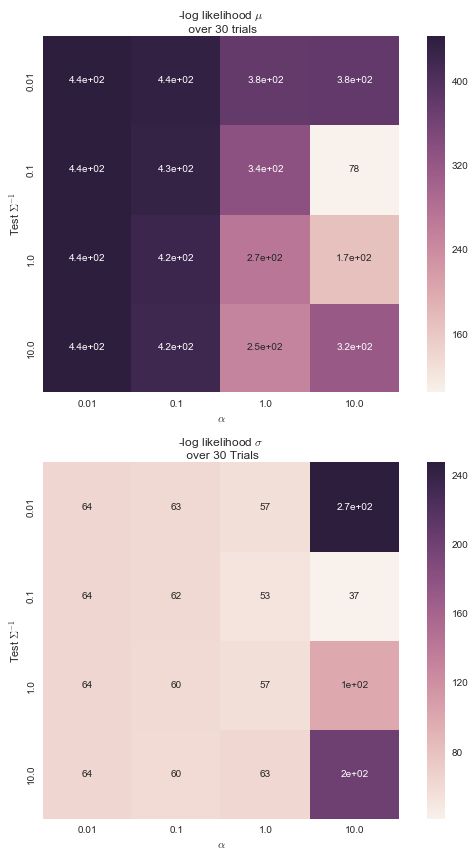

In [54]:
f, ax = plt.subplots(nrows=2, figsize=(8,12))
sns.heatmap(-all_01_trials_branin[:,:,:-1].mean(axis=0),
            xticklabels=alpha_set, yticklabels=sig_scale, 
           robust=True, annot=True, ax=ax[0], square=True)
ax[0].set_xlabel(r'$\alpha$')
ax[0].set_ylabel(r'Test $\Sigma^{-1}$')
ax[0].set_title('-log likelihood $\mu$ \n over 30 trials')

sns.heatmap(all_01_trials_branin[:,:,:-1].std(axis=0),
            xticklabels=alpha_set, yticklabels=sig_scale, 
           robust=True, annot=True, ax=ax[1], square=True)
ax[1].set_xlabel(r'$\alpha$')
ax[1].set_ylabel(r'Test $\Sigma^{-1}$')
ax[1].set_title('-log likelihood $\sigma$ \n over 30 Trials')
plt.tight_layout()
# cbar_ax = f.axes[-1]
# cbar_ax.set_ylabel('-log likelihood')
# plt.show()

In [30]:
solution.shape

(30L, 4L, 2L)

In [40]:
np.nan_to_num(-all_01_trials_branin)[:,:,:-1].mean(axis=0)

array([[ 444.46785893,  436.6947264 ,  380.85041602,  382.98939849],
       [ 444.08617516,  432.78870113,  335.03539829,   77.57730401],
       [ 443.28504248,  424.78253901,  272.7117936 ,  170.1304198 ],
       [ 443.12563043,  423.13546892,  253.5473089 ,  321.03830029]])

In [58]:
np.savetxt('all_01_trials_branin.txt', 
           all_01_trials_branin[:,:,:-1], fmt='%.4e')

ValueError: fmt has wrong number of % formats:  .4e

In [66]:
data = all_01_trials_branin[:,:,:-1]

# Write the array to disk
with file('all_01_trials_branin.txt', 'w') as outfile:
    # I'm writing a header here just for the sake of readability
    # Any line starting with "#" will be ignored by numpy.loadtxt
    outfile.write('# 0.1 sig - Array shape (trial/sig/alpha): {0}\n'.format(data.shape))

    # Iterating through a ndimensional array produces slices along
    # the last axis. This is equivalent to data[i,:,:] in this case
    for data_slice in data:

        # The formatting string indicates that I'm writing out
        # the values in left-justified columns 7 characters in width
        # with 2 decimal places.  
        np.savetxt(outfile, data_slice, fmt='%.4e')

        # Writing out a break to indicate different slices...
        outfile.write('# New trial\n')

In [65]:
np.loadtxt('all_01_trials_branin.txt').reshape((30,4,4))

array([[[ -460.95 ,  -455.87 ,  -408.98 ,  -181.99 ],
        [ -460.8  ,  -454.39 ,  -392.93 ,  -105.29 ],
        [ -460.31 ,  -449.48 ,  -346.06 ,  -117.57 ],
        [ -459.67 ,  -443.15 ,  -291.6  ,  -457.22 ]],

       [[ -460.34 ,  -450.04 ,  -371.51 ,  -215.71 ],
        [ -459.84 ,  -444.96 ,  -318.35 ,   -34.463],
        [ -458.67 ,  -433.3  ,  -244.48 ,  -371.8  ],
        [ -458.01 ,  -426.71 ,  -212.88 ,  -898.87 ]],

       [[ -460.3  ,  -449.75 ,  -387.27 ,  -656.16 ],
        [ -459.87 ,  -445.21 ,  -317.02 ,   -34.509],
        [ -458.79 ,  -434.38 ,  -227.82 ,  -138.28 ],
        [ -458.37 ,  -430.26 ,  -189.85 ,  -178.33 ]],

       [[ -460.89 ,  -455.73 ,  -444.49 , -1049.3  ],
        [ -460.43 ,  -450.86 ,  -368.12 ,   -52.596],
        [ -459.8  ,  -444.48 ,  -309.33 ,  -194.24 ],
        [ -459.94 ,  -445.79 ,  -310.79 ,  -156.11 ]],

       [[ -460.5  ,  -451.78 ,  -397.08 ,  -477.2  ],
        [ -460.26 ,  -449.19 ,  -354.48 ,   -88.556],
        [ -459.95 , 